# Cluster Analysis

The following tutorial contains Python examples for solving classification problems. You should refer to Chapters 7 and 8 of the "Introduction to Data Mining" book to understand some of the concepts introduced in this tutorial. The notebook can be downloaded from http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial8/tutorial8.ipynb.

Cluster analysis seeks to partition the input data into groups of closely related instances so that instances that belong to the same cluster are more similar to each other than to instances that belong to other clusters. In this tutorial, we will provide examples of using different clustering techniques provided by the scikit-learn library package. 

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.


## K-means Clustering

The k-means clustering algorithm represents each cluster by its corresponding cluster centroid. The algorithm would partition the input data into *k* disjoint clusters by iteratively applying the following two steps:
1. Form *k* clusters by assigning each instance to its nearest centroid.
2. Recompute the centroid of each cluster.

In this section, we perform k-means clustering on a toy example of movie ratings dataset. We first create the dataset as follows.

In [ ]:
import pandas as pd

ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
columns = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=columns)
movies

In this example dataset, the first 3 users liked action movies (Jaws and Star Wars) while the last 3 users enjoyed horror movies (Exorcist and Omen). Our goal is to apply k-means clustering on the users to identify groups of users with similar movie preferences.

The example below shows how to apply k-means clustering (with k=2) on the movie ratings data. We must remove the "user" column first before applying the clustering algorithm. The cluster assignment for each user is displayed as a dataframe object.

In [ ]:
from sklearn import cluster

data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

The k-means clustering algorithm assigns the first three users to one cluster and the last three users to the second cluster. The results are consistent with our expectation. We can also display the centroid for each of the two clusters.

In [ ]:
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

Observe that cluster 0 has higher ratings for the horror movies whereas cluster 1 has higher ratings for action movies. The cluster centroids can be applied to other users to determine their cluster assignments. 

In [ ]:
import numpy as np

testData = np.array([[4,5,1,2],[3,2,4,4],[2,3,4,1],[3,2,3,3],[5,4,1,4]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','kim','liz','tom','bill']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

To determine the number of clusters in the data, we can apply k-means with varying number of clusters from 1 to 6 and compute their corresponding sum-of-squared errors (SSE) as shown in the example below. The "elbow" in the plot of SSE versus number of clusters can be used to estimate the number of clusters.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

## Hierarchical Clustering

This section demonstrates examples of applying hierarchical clustering to the vertebrate dataset used in Module 6 (Classification). Specifically, we illustrate the results of using 3 hierarchical clustering algorithms provided by the Python scipy library: (1) single link (MIN), (2) complete link (MAX), and (3) group average. Other hierarchical clustering algorithms provided by the library include centroid-based and Ward's method.

In [ ]:
import pandas as pd

data = pd.read_csv('../Data/vertebrate.csv',header='infer')
data

### 8.2.1 Single Link (MIN)

In [ ]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
Z = hierarchy.linkage(X.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### 8.2.2 Complete Link (MAX)

In [ ]:
Z = hierarchy.linkage(X.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

### 8.3.3 Group Average

In [ ]:
Z = hierarchy.linkage(X.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

## 8.3 Density-Based Clustering

Density-based clustering identifies the individual clusters as high-density regions that are separated by regions of low density. DBScan is one of the most popular density based clustering algorithms. In DBScan, data points are classified into 3 types---core points, border points, and noise points---based on the density of their local neighborhood. The local neighborhood density is defined according to 2 parameters:  radius of neighborhood size (eps) and minimum number of points in the neighborhood (min_samples). 

For this approach, we will use a noisy, 2-dimensional dataset originally created by Karypis et al. [1] for evaluating their proposed CHAMELEON algorithm. The example code shown below will load and plot the distribution of the data.

In [ ]:
import pandas as pd

data = pd.read_csv('../Data/chameleon.csv', delimiter=' ', names=['x','y'])
print(data)
data.plot.scatter(x='x',y='y')

We apply the DBScan clustering algorithm on the data by setting the neighborhood radius (eps) to 15.5 and minimum number of points (min_samples) to be 5. The clusters are assigned to IDs between 0 to 8 while the noise points are assigned to a cluster ID equals to -1.

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')

Let's compare these algorithmn on son toy datasets

In [ ]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
n_samples = 1500
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=170
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=170)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=170)
rng = np.random.RandomState(170)
no_structure = rng.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170
)

In [ ]:
X, y = noisy_circles
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {"n_neighbors": 10, "n_clusters": 3}

datasets = [
    (noisy_circles, {"n_clusters": 2}),
    (noisy_moons, {"n_clusters": 2}),
    (varied, {"n_neighbors": 2}),
    (aniso, {"n_neighbors": 2}),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    ward = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="ward"
    )
    complete = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="complete"
    )
    average = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="average"
    )
    single = cluster.AgglomerativeClustering(
        n_clusters=params["n_clusters"], linkage="single"
    )

    clustering_algorithms = (
        ("Single Linkage", single),
        ("Average Linkage", average),
        ("Complete Linkage", complete),
        ("Ward Linkage", ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

## Validation Using Sorted Similarity Matrix.

from https://medium.com/@devamsheth20/statistical-test-for-k-means-cluster-validation-in-python-using-sorted-similarity-matrix-1e644ab029c0

In [88]:
import pandas as pd
import numpy as np
np.random.seed(0)
data = pd.read_csv('https://docs.google.com/uc?export=download&id=1CjR6Q6nMN_2pTJJietr07mRjEYYSWR7U', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-8.546479,-3.098906,-10.766467,-9.544370,11.580211,2.527385,-7.541890,2.382157,-0.701969,7.981505,...,-8.948258,-16.062739,-3.382831,3.898642,-7.515572,-4.729179,8.105720,-8.494811,11.012694,-5.770526
1,1.472420,14.329548,-1.386993,-0.340373,10.464385,-7.883887,-11.668266,5.765549,13.572861,-2.065186,...,0.379692,-7.964724,4.768435,1.002610,11.437404,-1.280794,-7.001593,1.337840,0.138980,-5.134064
2,5.118916,9.939231,-5.338687,-1.445761,8.098372,-5.761612,-12.977400,-0.516004,9.223066,-3.431234,...,-5.202991,-8.561189,6.656612,8.321154,3.957509,-5.170569,-5.462176,1.378981,0.207315,-11.161425
3,-5.105912,2.268417,-7.567826,-6.591087,7.964442,-0.391878,-4.948580,3.831515,-2.227220,2.412576,...,-10.020382,-7.769177,5.070062,8.793787,-4.311541,-1.619541,13.506044,-6.870152,5.998028,-2.168215
4,-5.813215,6.817753,-10.760419,-5.819073,5.371229,-3.583895,-5.904666,-1.621887,1.637194,7.886975,...,-5.606791,-10.416522,-1.713511,11.711905,-11.640990,-9.297318,9.303570,-7.530955,10.062977,-8.680930


In [89]:
data.shape

(100, 32)

Proceed with normalization step

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaleddf = scaler.fit_transform(data)

In [91]:
scaleddf

array([[-1.32397488, -2.15331389, -1.30617884, ..., -1.43572959,
         1.282697  , -0.27195137],
       [ 0.6741796 ,  1.78788701,  0.16306646, ...,  0.7831528 ,
        -0.7911425 , -0.17376783],
       [ 1.40143149,  0.79507846, -0.4559457 , ...,  0.79243695,
        -0.77810958, -1.10357568],
       ...,
       [ 0.19999439, -0.85384167,  1.79419982, ...,  0.71456975,
         0.49903524,  0.93819064],
       [-0.21339526,  0.14142584,  0.49250256, ..., -0.73859053,
        -0.22033078,  1.3348914 ],
       [ 1.36324674,  0.71333435,  0.5247944 , ...,  0.59116094,
        -1.52592029, -0.3540244 ]])

PCA helps in identifying patterns, reducing noise, and gaining insights from complex datasets. We’ll use Python’s scikit-learn library to perform PCA and demonstrate how it can effectively reduce the dimensions of data for visualization purposes.

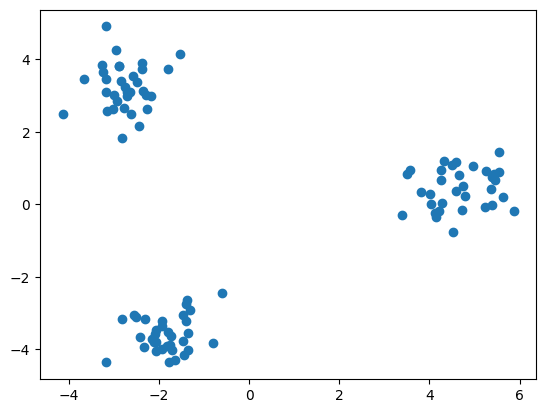

In [92]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df_pca = PCA(n_components=2).fit_transform(scaleddf)
plt.scatter(df_pca[:,0], df_pca[:,1],alpha=1)

Clustering K-means

/Users/beppe2hd/opt/anaconda3/envs/DataMining/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


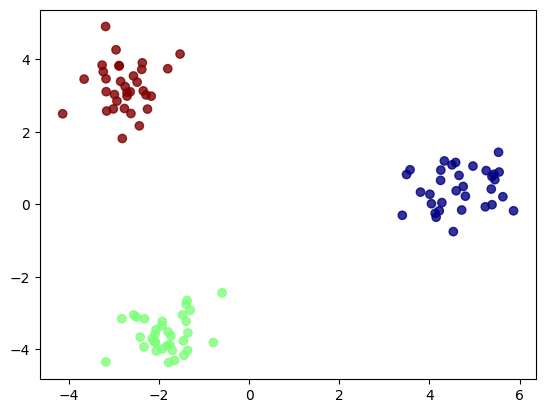

In [93]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 3)
clf.fit(scaleddf)
labels = clf.labels_
## Plotting the clusters
import matplotlib.pyplot as plt
plt.scatter(df_pca[:,0], df_pca[:,1], alpha=0.8, c=labels, cmap='jet')

Let's comute SSE (Sum of Squared errors)

In [94]:
sse = clf.inertia_
print('SSE of Given data =' , sse)

SSE of Given data = 1322.2687058271963


#### Silhouette score
Assessing the coherence and separation of clusters by computing the average silhouette coefficient for each data point, which measures how similar it is to its own cluster compared to neighboring clusters.

In [95]:
from sklearn.metrics import silhouette_score

kmean_ss = silhouette_score(scaleddf,labels)

print('Silhouette score of Given data\'s clsuter result =',kmean_ss)

Silhouette score of Given data's clsuter result = 0.4060288765382684


silhouette scor for each sample

In [96]:
from sklearn.metrics import silhouette_samples

kmean_ss_samples = silhouette_samples(scaleddf,labels)

In [100]:
kmean_ss_samples.mean()

0.4060288765382684

In [102]:
set(labels)

{0, 1, 2}

In [104]:
labels

array([0, 2, 2, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 2,
       0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 1, 2, 0,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1,
       2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 2], dtype=int32)

In [112]:
s_0 = [s for s,l in zip(kmean_ss_samples, labels) if l==0 ]
s_1 = [s for s,l in zip(kmean_ss_samples, labels) if l==1 ]
s_2 = [s for s,l in zip(kmean_ss_samples, labels) if l==2 ]

In [113]:
np.mean(s_0)
print(f"Siluette valeu for cluster 0 is: {np.mean(s_0)}")
print(f"Siluette valeu for cluster 1 is: {np.mean(s_1)}")
print(f"Siluette valeu for cluster 2 is: {np.mean(s_2)}")

Siluette valeu for cluster 0 is: 0.4348848135042904
Siluette valeu for cluster 1 is: 0.40477234568495063
Siluette valeu for cluster 2 is: 0.37846754711808916


Similarity matrix
Similarity matrix also called a distance/ proximity matrix is a matrix with a pairwise distance of data points and a Sorted Similarity matrix will be sorted by cluster labels.

Calculating and plotting the sorted Similarity Matrix

In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances

pairwisedist = pairwise_distances(scaleddf, metric='cosine')

In [ ]:
pairwisedist.shape

In [ ]:

# sorting by labels
indes_of_sorted_labels = np.argsort(clf.labels_)

sorted_pairwisedist = pairwisedist[indes_of_sorted_labels][:,indes_of_sorted_labels]
labels = clf.labels_[indes_of_sorted_labels]

# keeping the distance values between 0 and 1.
sorted_pairwisedist = sorted_pairwisedist / np.max(sorted_pairwisedist)
sorted_similarity = 1- sorted_pairwisedist / np.max(sorted_pairwisedist)

#plotting 
import matplotlib.pyplot as plt
plt.imshow(sorted_similarity,cmap ='jet')
plt.colorbar()

Code For ideal Matrix :

In [ ]:
labels

In [ ]:
incidence_matrix = np.zeros_like(sorted_similarity)
for i in range(len(labels)):
    for j in range(len(labels)):
        incidence_matrix[i,j] = int(labels[i] == labels[j])

plt.imshow(incidence_matrix,cmap ='jet')
plt.colorbar()

Correlation between Incidence and distance/Similarity Matrix :

In [ ]:
sorted_pairwisedist.flatten().shape

In [ ]:
corr_org = np.corrcoef(sorted_pairwisedist.flatten(), incidence_matrix.flatten())


In [ ]:
print(f"The correlation coefficient if {corr_org[0, 1]}")

Here there is a high correlation with the Ideal matrix suggesting that points that belong to the same cluster are close to each other. The negative value is due to the distance matrix, the distance matrix is opposite of similarity matrix i.e. if the distance is 0 the similarity is 1 and vice versa.

Work with random data

In [ ]:
ranges = [(data[col].min(), data[col].max()) for col in data.columns] # specify different ranges for each column
randomdata = np.random.default_rng().uniform(low=ranges[0][0], high=ranges[0][1], size=(100, 1))
for r in ranges[1:]:
    randomdata = np.concatenate((randomdata, np.random.randint(low=r[0], high=r[1], size=(100, 1))), axis=1)
randomdf = pd.DataFrame(randomdata)

In [ ]:
randomdf.head

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaledranddf = scaler.fit_transform(randomdf)

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
df_pca = PCA(n_components=2).fit_transform(scaledranddf)
plt.scatter(df_pca[:,0], df_pca[:,1],alpha=1)

In [ ]:
from sklearn.cluster import KMeans
clfr = KMeans(n_clusters = 3)

clfr.fit(scaledranddf)

print('SSE of random data\'s cluster result  =' , clfr.inertia_)

print('Silhouette score of Random data\'s cluster result =',silhouette_score(scaledranddf,clfr.labels_))

import matplotlib.pyplot as plt
plt.scatter(df_pca[:,0], df_pca[:,1], alpha=0.8, c=clfr.labels_, cmap='jet')

In [ ]:
print('SSE of random data\'s cluster result =' , clfr.inertia_)

In [ ]:
print('Silhouette score of Random data\'s cluster result =',silhouette_score(scaledranddf,clfr.labels_))

In [ ]:
# sorting by labels
indes_of_sorted_labels = np.argsort(clfr.labels_)

sorted_pairwisedist = pairwisedist[indes_of_sorted_labels][:,indes_of_sorted_labels]
labels = clf.labels_[indes_of_sorted_labels]

# keeping the distance values between 0 and 1.
sorted_pairwisedist = sorted_pairwisedist / np.max(sorted_pairwisedist)
sorted_similarity = 1- sorted_pairwisedist / np.max(sorted_pairwisedist)

#plotting 
import matplotlib.pyplot as plt
plt.imshow(sorted_similarity,cmap ='jet')
plt.colorbar()

In [ ]:
corr_org = np.corrcoef(sorted_pairwisedist.flatten(), incidence_matrix.flatten())

In [ ]:
corr_org[0][1]